In [ ]:
# Linear Regression Modeling - Housing Price Prediction

This notebook implements linear regression for the Kaggle House Prices dataset as part of the Housing Price Prediction Project. It includes:
- Loading preprocessed data (`/Users/junshao/bootcamp_Jun_Shao/homework/hw10/data/processed/updated_encoded_train.csv`).
- Fitting a linear regression model to predict `SalePrice`.
- Adding a transformed feature (GrLivArea²) to capture non-linear effects.
- Computing R² and RMSE.
- Analyzing residuals for linearity, independence, homoscedasticity, and normality.
- Visualizing residuals (vs. fitted, histogram, Q-Q, vs. GrLivArea).

The goal is to assess model performance and validate assumptions for reliable predictions.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import probplot
import os
import sys
from dotenv import load_dotenv

# Add project root to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

# Load environment variables
load_dotenv()
DATA_DIR_PROCESSED = os.getenv('DATA_DIR_PROCESSED')

# Verify environment variables
print(f'DATA_DIR_PROCESSED: {DATA_DIR_PROCESSED}')

# Set random seed
np.random.seed(7)
sns.set()
plt.rcParams['figure.figsize'] = (9, 4)

DATA_DIR_PROCESSED: /Users/junshao/bootcamp_Jun_Shao/homework/hw10/data/processed


In [2]:
# Load dataset
data_path = '/Users/junshao/bootcamp_Jun_Shao/homework/hw10/data/processed/updated_encoded_train.csv'
df = pd.read_csv(data_path)

# Display initial state
print('Data Shape:', df.shape)
print('Data Preview:')
print(df.head())

Data Shape: (1460, 112)
Data Preview:
   SalePrice  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
0   0.241078         65.0  0.033420     0.666667            5       196.0   
1   0.203583         80.0  0.038795     0.555556            8         0.0   
2   0.261908         68.0  0.046507     0.666667            5       162.0   
3   0.145952         60.0  0.038561     0.666667            5         0.0   
4   0.298709         84.0  0.060576     0.777778            5       350.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  SaleType_ConLI  \
0         706           0        150          856  ...             0.0   
1         978           0        284         1262  ...             0.0   
2         486           0        434          920  ...             0.0   
3         216           0        540          756  ...             0.0   
4         655           0        490         1145  ...             0.0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleTyp

In [3]:
# Select features
features = ['LotFrontage', 'LotArea', 'OverallQual'] + [col for col in df.columns if 'Neighborhood_' in col or 'MSSubClass_' in col or 'MSZoning_' in col]
df['LotArea_squared'] = df['LotArea'] ** 2  # Transformed feature
features.append('LotArea_squared')

# Define target
target = 'SalePrice'

# Check for missing values
print('Missing Values in Features and Target:')
print(df[features + [target]].isna().sum())

Missing Values in Features and Target:
LotFrontage             0
LotArea                 0
OverallQual             0
Neighborhood_Blmngtn    0
Neighborhood_Blueste    0
Neighborhood_BrDale     0
Neighborhood_BrkSide    0
Neighborhood_ClearCr    0
Neighborhood_CollgCr    0
Neighborhood_Crawfor    0
Neighborhood_Edwards    0
Neighborhood_Gilbert    0
Neighborhood_IDOTRR     0
Neighborhood_MeadowV    0
Neighborhood_Mitchel    0
Neighborhood_NAmes      0
Neighborhood_NPkVill    0
Neighborhood_NWAmes     0
Neighborhood_NoRidge    0
Neighborhood_NridgHt    0
Neighborhood_OldTown    0
Neighborhood_SWISU      0
Neighborhood_Sawyer     0
Neighborhood_SawyerW    0
Neighborhood_Somerst    0
Neighborhood_StoneBr    0
Neighborhood_Timber     0
Neighborhood_Veenker    0
MSSubClass_20           0
MSSubClass_30           0
MSSubClass_40           0
MSSubClass_45           0
MSSubClass_50           0
MSSubClass_60           0
MSSubClass_70           0
MSSubClass_75           0
MSSubClass_80           0

In [4]:
# Split data
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

print('Training Shape:', X_train.shape)
print('Test Shape:', X_test.shape)

Training Shape: (1168, 49)
Test Shape: (292, 49)


In [6]:
# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Fix for older scikit-learn
print(f'R²: {r2:.2f}')
print(f'RMSE: {rmse:.3f}')

R²: 0.72
RMSE: 0.063


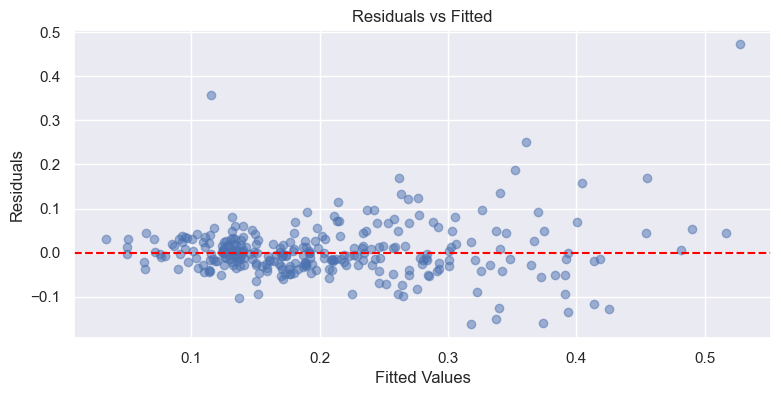

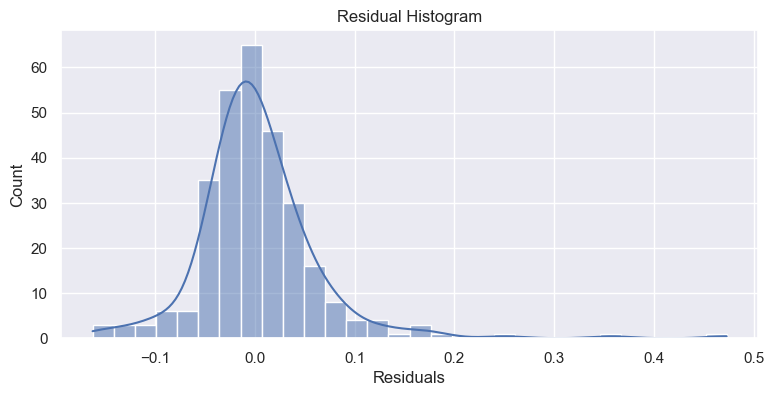

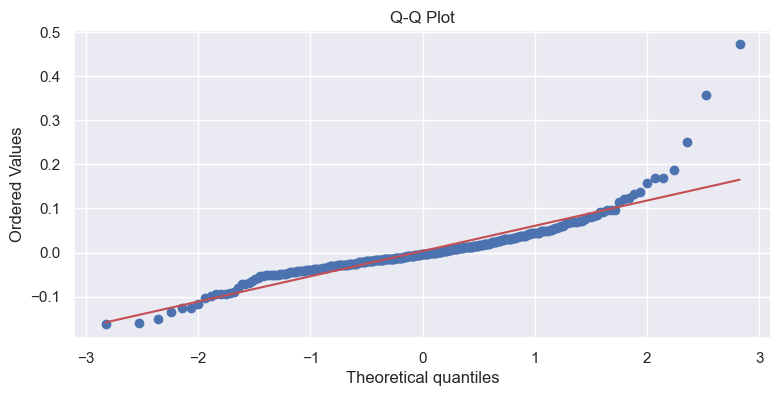

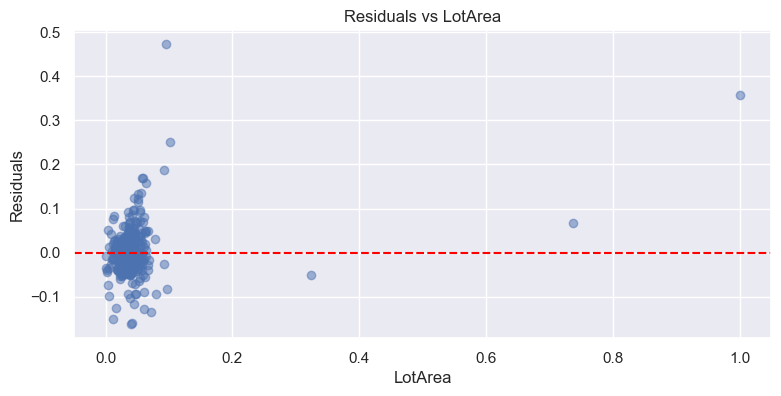

In [7]:
# Compute residuals
residuals = y_test - y_pred

# Residuals vs. Fitted
plt.figure()
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

# Residual Histogram
plt.figure()
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Residual Histogram')
plt.show()

# Q-Q Plot
plt.figure()
probplot(residuals, dist='norm', plot=plt)
plt.title('Q-Q Plot')
plt.show()

# Residuals vs. LotArea
plt.figure()
plt.scatter(X_test['LotArea'], residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('LotArea')
plt.ylabel('Residuals')
plt.title('Residuals vs LotArea')
plt.show()